In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import librosa
import parselmouth 
from parselmouth import praat


In [35]:
fs,audio_female = wav.read('female.wav')
fs,audio_male = wav.read('male.wav')

#Normalising the audio Signal

audio_female_norm = audio_female/np.max(np.abs(audio_female))
audio_male_norm = audio_male/np.max(np.abs(audio_male))



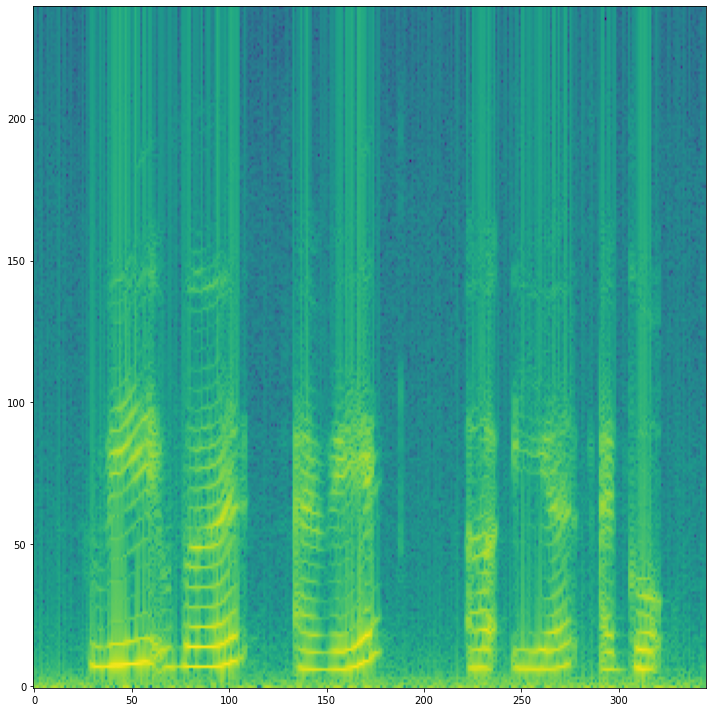

In [18]:
# Computing the Spectrogram

frame_size = 30   #ms
hop_size = 10     #ms
# window_type = np.hamming()
window_size = int(frame_size*fs/1000) #512
window_hop_size = int(hop_size*fs/1000) 
window_type = np.hamming(window_size)

spectrum = []
for idx in range(0, audio_female.shape[0]+1, window_hop_size):
    x = np.fft.fft(audio_female[idx:idx + window_size], n=window_size)
    x = np.fft.fftshift(x)[window_size//2:window_size]
    power_spectrum = np.real(x*np.conjugate(x))
    log_norm = 10*np.log10(power_spectrum)
    spectrum.append(log_norm)
spectrum = np.array(spectrum)
f = np.fft.fftshift(np.fft.fftfreq(window_size, d=1/fs))[window_size//2:window_size]


plt.imshow(spectrum.T,origin='lower',aspect='auto')

In [43]:
# Computing the ZCR
ZCR_fm = librosa.feature.zero_crossing_rate(audio_female_norm,frame_length=window_size,hop_length=window_hop_size,center = 'True')
ZCR_m = librosa.feature.zero_crossing_rate(audio_male_norm,frame_length=window_size,hop_length=window_hop_size,center = 'True')


# Computing The Short_Term_Energy
STE_fm =[] #short term energy
for i in range(0,audio_female_norm.shape[0],int(window_hop_size)):
    x = audio_female_norm[i:i+int(window_hop_size)]**2
    sum_x = np.sum(x)
    STE_fm.append(sum_x)
STE_fm = np.array(STE_fm,dtype=object) 

STE_m =[] #short term energy
for i in range(0,audio_male_norm.shape[0],int(window_hop_size)):
    x = audio_male_norm[i:i+int(window_hop_size)]**2
    sum_x = np.sum(x)
    STE_m.append(sum_x)
STE_m = np.array(STE_m,dtype=object) 


# Computing the VAD
Threshold_fm = 5
vad_fm = np.array(STE_fm) >= Threshold_fm

Threshold_m = 10
vad_m = np.array(STE_m) >= Threshold_m


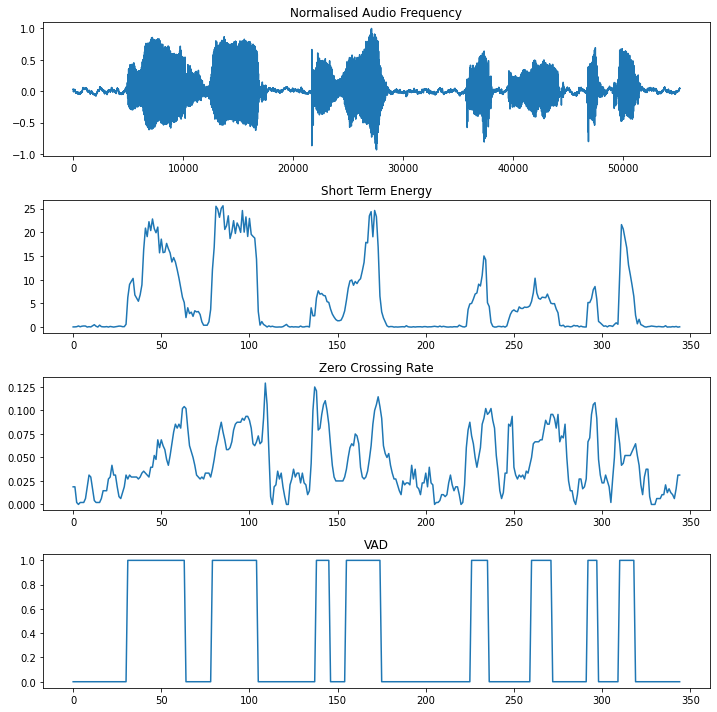

In [44]:
# For Performing the VAD on the Female_Audio
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(411)
plt.plot(audio_female_norm)
plt.title('Normalised Audio Frequency')
plt.subplot(412)
plt.plot(STE_fm)
plt.title('Short Term Energy')
plt.subplot(413)
plt.plot(np.fft.rfft(ZCR_fm.T))
plt.title('Zero Crossing Rate')
plt.subplot(414)
plt.plot(vad_fm)
plt.title('VAD')

plt.show()

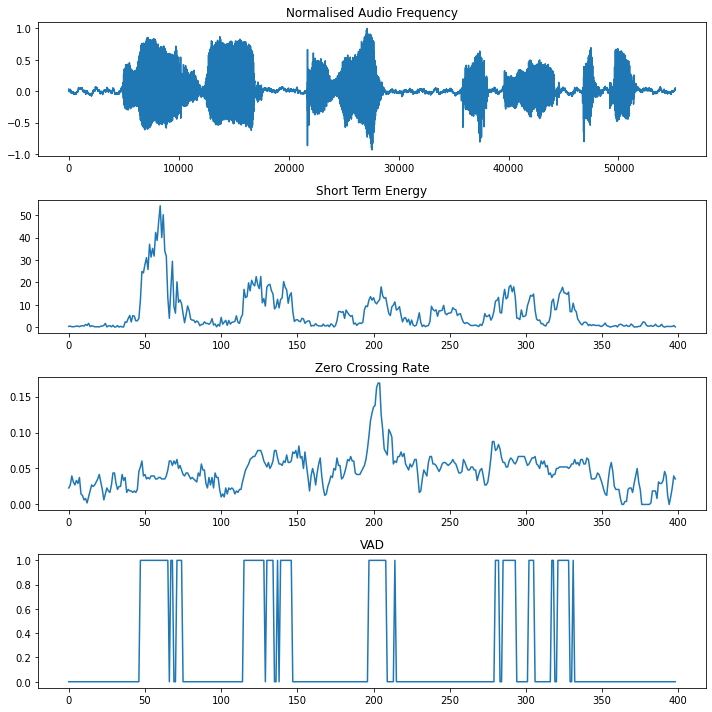

In [45]:
# For Performing the VAD on the Female_Audio
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(411)
plt.plot(audio_female_norm)
plt.title('Normalised Audio Frequency')
plt.subplot(412)
plt.plot(STE_m)
plt.title('Short Term Energy')
plt.subplot(413)
plt.plot(np.fft.rfft(ZCR_m.T))
plt.title('Zero Crossing Rate')
plt.subplot(414)
plt.plot(vad_m)
plt.title('VAD')

plt.show()

In [37]:
# Extracting the Formant
audio_fm = parselmouth.Sound('female.wav')
f0min=75
f0max=300
pointProcess = praat.call(audio_fm, "To PointProcess (periodic, cc)", f0min, f0max)
formants = praat.call(audio_fm, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
numPoints = praat.call(pointProcess, "Get number of points")
f1_fm = []
f2_fm = []
time_fm =[]
for point in range(0, numPoints):
    point += 1
    t_1 = praat.call(pointProcess, "Get time from index", point)
    f1_1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
    f2_1 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
    f1_fm.append(f1_1)
    f2_fm.append(f2_1)
    time_fm.append(t_1)

# Formant Extraction for male
audio_m = parselmouth.Sound('male.wav')
f0min=75
f0max=300
pointProcess = praat.call(audio_m, "To PointProcess (periodic, cc)", f0min, f0max)
formants = praat.call(audio_m, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
numPoints = praat.call(pointProcess, "Get number of points")
f1_m = []
f2_m = []
time_m =[]
for point in range(0, numPoints):
    point += 1
    t = praat.call(pointProcess, "Get time from index", point)
    f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
    f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
    f3 = praat.call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
    f1_m.append(f1)
    f2_m.append(f2)
    time_m.append(t)




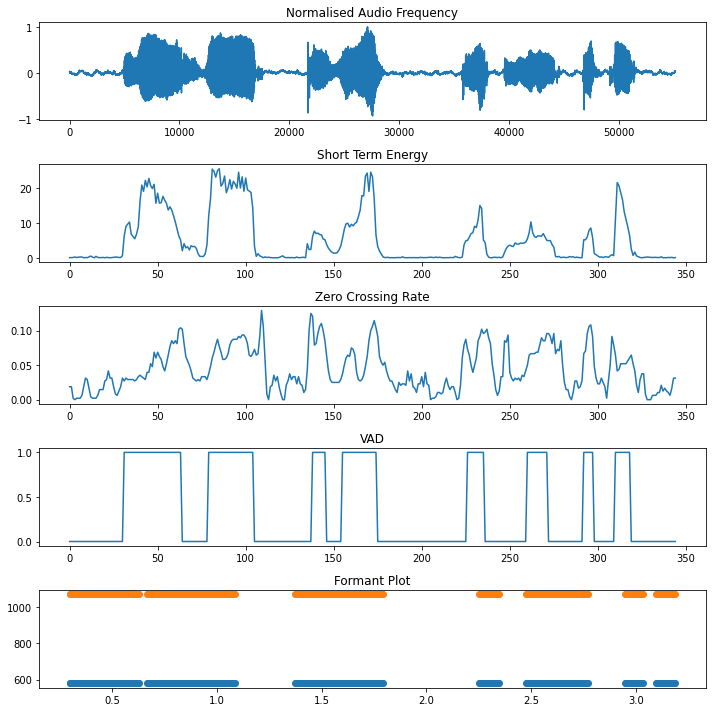

In [49]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(511)
plt.plot(audio_female_norm)
plt.title('Normalised Audio Frequency')
plt.subplot(512)
plt.plot(STE_fm)
plt.title('Short Term Energy')
plt.subplot(513)
plt.plot(np.fft.rfft(ZCR_fm.T))
plt.title('Zero Crossing Rate')
plt.subplot(514)
plt.plot(vad_fm)
plt.title('VAD')
plt.subplot(515)
plt.scatter(time_fm,f1_fm)
plt.scatter(time_fm,f2_fm)
plt.title('Formant Plot')
plt.show()

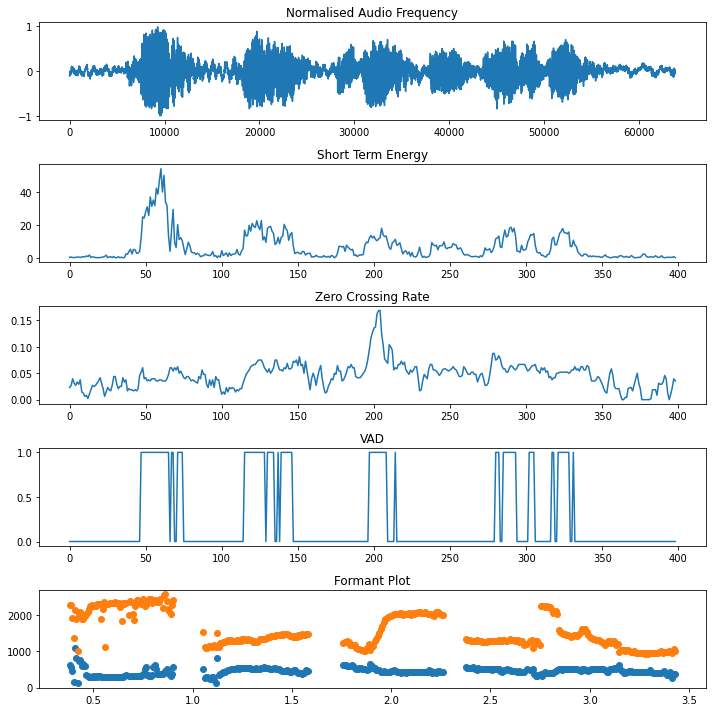

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(511)
plt.plot(audio_male_norm)
plt.title('Normalised Audio Frequency')
plt.subplot(512)
plt.plot(STE_m)
plt.title('Short Term Energy')
plt.subplot(513)
plt.plot(np.fft.rfft(ZCR_m.T))
plt.title('Zero Crossing Rate')
plt.subplot(514)
plt.plot(vad_m)
plt.title('VAD')
plt.subplot(515)
plt.scatter(time_m,f1_m)
plt.scatter(time_m,f2_m)
plt.title('Formant Plot')
plt.show()

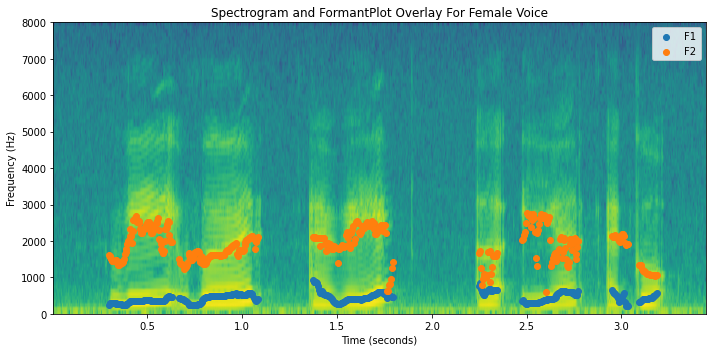

In [33]:
# Overlaying the Formant and the Pitch on the Spectrogram
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.specgram(audio_female_norm, Fs=fs, NFFT=int(fs*0.01))
plt.scatter(time_fm,f1_fm)
plt.scatter(time_fm,f2_fm)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.legend(['F1','F2'])
plt.title('Spectrogram and FormantPlot Overlay For Female Voice')
plt.tight_layout()

plt.show()


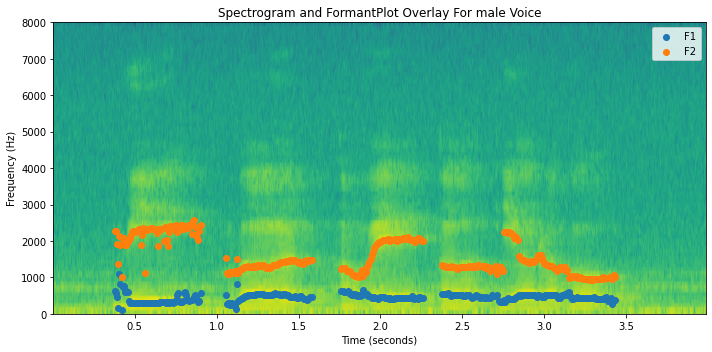

In [48]:
# Overlaying the Formant and the Pitch on the Spectrogram
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.specgram(audio_male_norm, Fs=fs, NFFT=int(fs*0.01))
plt.scatter(time_m,f1_m)
plt.scatter(time_m,f2_m)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.legend(['F1','F2'])
plt.title('Spectrogram and FormantPlot Overlay For male Voice')
plt.tight_layout()

plt.show()
